In [7]:
%%html
<script>
(function() {
  // Create the toggle button
  const rtlButton = document.createElement("button");
  rtlButton.textContent = "Toggle LTR";
  rtlButton.id = "top-rtl-toggle";
  rtlButton.style.marginLeft = "8px";
  rtlButton.style.padding = "4px 10px";
  rtlButton.style.fontSize = "14px";
  rtlButton.style.cursor = "pointer";

  // State
  var rtlActive = false;

  // Styling function
  var applyStyleToEditor = (editor) => {
    if (!editor) return;
    var direction = getComputedStyle(editor).getPropertyValue('direction')=='rtl' ? 'ltr' : 'rtl';
    var text_align = getComputedStyle(editor).getPropertyValue('text-align')=='right' ? 'left' : 'right';
    editor.style.setProperty('direction', direction, 'important');
    editor.style.setProperty('text-align', text_align, 'important');
  };

  // Toggle logic
  rtlButton.onclick = () => {
    rtlActive = !rtlActive;
    rtlButton.textContent = rtlActive ? "Toggle LTR" : "Toggle RTL";
    document.querySelectorAll('.jp-MarkdownCell .jp-InputArea-editor').forEach(applyStyleToEditor);
    document.querySelectorAll('.jp-RenderedHTMLCommon code, .jp-RenderedHTMLCommon code span').forEach(applyStyleToEditor);
    document.querySelectorAll('jp-RenderedHTMLCommon, .jp-RenderedHTMLCommon *').forEach(applyStyleToEditor);
  };

  // Watch for focus into editing Markdown cells
  // document.addEventListener('focusin', (event) => {
  //   const editor = event.target.closest('.jp-MarkdownCell .jp-InputArea-editor');
  //    if (editor) applyStyleToEditor(editor);
  // });

  // Insert into top toolbar if not already present
  var insertIntoToolbar = () => {
    const toolbar = document.querySelector('.jp-NotebookPanel-toolbar');
    if (toolbar && !document.getElementById("top-rtl-toggle")) {
      toolbar.appendChild(rtlButton);
    } else {
      // Try again in a moment if toolbar isn't ready yet
      setTimeout(insertIntoToolbar, 300);
    }
  };

  insertIntoToolbar();
})();
</script>

## רשימות: אופרטורים בסיסיים ואינדקסים

In [32]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/0LVbQjww4XM?si=v7H2jN2R5p9HVHr7" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

בסרטון זה למדנו איך לעבוד עם רשימות בפייתון. ראינו איך ליצור רשימה חדשה, איך לשכפל אותה או לחבר שתי רשימות יחד, ואיך להשוות בין רשימות שונות. בנוסף, התנסינו בחיפוש ערכים בתוך רשימה ולמדנו כיצד לגשת לאיברים ספציפיים בעזרת אינדקסים. כל הכלים האלה מאפשרים לנו לנהל אוספי נתונים בצורה גמישה ונוחה.

**לנוחותכם חלונית עם הקוד שראינו בסרטון. מוזמנים להריץ בעצמכם:**

In [10]:
lst1 = [1,5,4]
lst2 = ["hello", "world"]
lst3 = [23, 5.6, -17, "computer"]
lst4 = []
# print(lst3)
# print(len(lst3))
#print([1,2] + [3])
#print(lst1 + [888])
#print(lst1 + [888,999])
#print(lst1 + lst4)
#print([1,2] * 4)
#print(lst3 * 2)
#print([1,2] == [2,1])
#print([1,2] == [1] + [2])
#print(2 in [1,2])
#print(3 in [1,2])
#print("hello" in lst2)
# print(lst3[0])
# print(lst3[1])
# print(lst3[2])
# i = 3
# print(lst3[i])
print(lst3[4])

IndexError: list index out of range

<h4 style="color:purple">
בחנו את עצמכם
</h4>

ניזכר בשתי הרשימות אותן ראינו בסרטון:

In [ ]:
lst1 = [1, 5, 4]
lst2 = ["hello", "world"]

נגדיר רשימה נוספת:

In [ ]:
lst3 = []

שימו לב - הרשימה lst3 היא **רשימה ריקה**.

בכל שאלה תופיע פקודה מסוימת המערבת את אחת או יותר מהרשימות הנ"ל. עליכם לסמן מהו הערך המוחזר מהפקודה, או לסמן כי הפקודה מביאה לשגיאה.

**דוגמאות**:

1. הפקודה `len(lst1)` מחזירה 3 - זהו אורך הרשימה `lst1`.

2. הפקודה `lst3[0]` מביאה לשגיאה, שכן הרשימה ריקה ולכן לא ניתן לגשת לאיבר שנמצא באינדקס 0 שלה.

לנוחיותכם, יצירנו חלונית קוד בה תוכלו לבדוק את עצמכם ולהשתכנע בנכונות התשובות. אנו ממליצים לענות תחילה על כל השאלות ולאחר מכן לבדוק את עצמכם בחלונית הקוד.

תזכורת: על מנת להציג את הערך המוחזר של פקודה מסוימת, "עטפו" אותה בפקודת `print`. למשל: `print(len(lst1))`

In [29]:
lst1 = [1, 5, 4]
lst2 = ["hello", "world"]
lst3 = []

# check your answers here:

In [14]:
import json
from jupyterquiz import display_quiz

example = \
'''
[{
    "question": "מה תהיה הפלט של הביטוי lst1 * 2 + [2]?",
    "type": "many_choice",
    "answers": [
        {
            "answer": "הפקודה גורמת לשגיאה",
            "correct": false,
            "feedback": "לא נכון"
        },        {
            "answer": "[4,12,10]",
            "correct": false,
            "feedback": "לא נכון"
        },
        {
            "answer": "[1,5,4,1,5,4,2]",
            "correct": true,
            "feedback": "נכון!"
        },
        {
            "answer": "[2,10,8,2]",
            "correct": false,
            "feedback": "לא נכון"
        }
    ]
}]
'''
myquiz = json.loads(example)
display_quiz(myquiz)



<IPython.core.display.Javascript object>

In [16]:
import json
from jupyterquiz import display_quiz

example = \
'''
[{
    "question": "מה תהיה התוצאה של len(lst1 + lst2)?",
    "type": "many_choice",
    "answers": [
        {
            "answer": "הפקודה גורמת לשגיאה",
            "correct": false,
            "feedback": "לא נכון"
        },        {
            "answer": "2",
            "correct": false,
            "feedback": "לא נכון"
        },
        {
            "answer": "5",
            "correct": true,
            "feedback": "נכון!"
        },
        {
            "answer": "3",
            "correct": false,
            "feedback": "לא נכון"
        }
    ]
}]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

In [19]:
import json
from jupyterquiz import display_quiz

example = \
'''
[{
    "question": "מה תהיה התוצאה של len(lst1 * 10)?",
    "type": "many_choice",
    "answers": [
        {
            "answer": "הפקודה גורמת לשגיאה",
            "correct": false,
            "feedback": "לא נכון"
        },
        {
            "answer": "30",
            "correct": true,
            "feedback": "נכון!"
        },
        {
            "answer": "50",
            "correct": false,
            "feedback": "לא נכון"
        },
        {
            "answer": "3",
            "correct": false,
            "feedback": "לא נכון"
        }
    ]
}]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

In [28]:
import json
from jupyterquiz import display_quiz

example = \
'''
[{
    "question": "מה תהיה התוצאה של lst1[2]?",
    "type": "many_choice",
    "answers": [
        {
            "answer": "הפקודה גורמת לשגיאה",
            "correct": false,
            "feedback": "לא נכון"
        },
        {
            "answer": "5",
            "correct": false,
            "feedback": "לא נכון"
        },
        {
            "answer": "4",
            "correct": true,
            "feedback": "נכון!"
        },
        {
            "answer": "1",
            "correct": false,
            "feedback": "לא נכון"
        }
    ]
}]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

In [22]:
import json
from jupyterquiz import display_quiz

example = \
'''
[{
    "question": "מה תהיה התוצאה של lst1[2] + lst2[1]?",
    "type": "many_choice",
    "answers": [
        {
            "answer": "הפקודה גורמת לשגיאה",
            "correct": true,
            "feedback": "נכון!"
        },
        {
            "answer": "world4",
            "correct": false,
            "feedback": "לא נכון"
        },
        {
            "answer": "worldworldworldworld",
            "correct": false,
            "feedback": "לא נכון"
        },
        {
            "answer": "4world",
            "correct": false,
            "feedback": "לא נכון"
        }
    ]
}]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

In [23]:
import json
from jupyterquiz import display_quiz

example = \
'''
[{
    "question": "מה תהיה התוצאה של lst3 + 3?",
    "type": "many_choice",
    "answers": [
        {
            "answer": "הפקודה גורמת לשגיאה",
            "correct": true,
            "feedback": "נכון!"
        },
        {
            "answer": "[]",
            "correct": false,
            "feedback": "לא נכון"
        },
        {
            "answer": "3",
            "correct": false,
            "feedback": "לא נכון"
        },
        {
            "answer": "[3]",
            "correct": false,
            "feedback": "לא נכון"
        }
    ]
}]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

In [25]:
import json
from jupyterquiz import display_quiz

example = \
'''
[{
    "question": "מה תהיה התוצאה של lst1 == [5,4] + [1]?",
    "type": "many_choice",
    "answers": [
        {
            "answer": "הפקודה גורמת לשגיאה",
            "correct": false,
            "feedback": "לא נכון"
        },
        {
            "answer": "False",
            "correct": true,
            "feedback": "נכון!"

        },
        {
            "answer": "True",
            "correct": false,
            "feedback": "לא נכון"
        }
    ]
}]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

In [27]:
import json
from jupyterquiz import display_quiz

example = \
'''
[{
    "question": "מה תהיה התוצאה של lst3 + [1,5,4] == lst1?",
    "type": "many_choice",
    "answers": [
        {
            "answer": "הפקודה גורמת לשגיאה",
            "correct": false,
            "feedback": "לא נכון"
        },
        {
            "answer": "True",
            "correct": true,
            "feedback": "נכון!"
        },
        {
            "answer": "False",
            "correct": false,
            "feedback": "לא נכון"
        }
    ]
}]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

עד כה למדנו שרשימה היא רצף מסודר של איברים.
בפייתון יוצרים רשימה על ידי עטיפת האיברים בסוגריים מרובעים ([]) והפרדתם באמצעות פסיקים.
חשוב לזכור שאפשר לשים ברשימה איברים מטיפוסים שונים, כלומר מספרים, מחרוזות, ערכים בוליאניים ואף רשימות נוספות – כל אלה יכולים להתקיים באותה רשימה.

In [ ]:
my_list = [2, 3, 5, 7, 11]
my_list

In [ ]:
days = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
days

In [ ]:
pi = ['pi', 3.14159, True]
pi

## גישה לאינדקסים ברשימות 

זוכרים את זה?

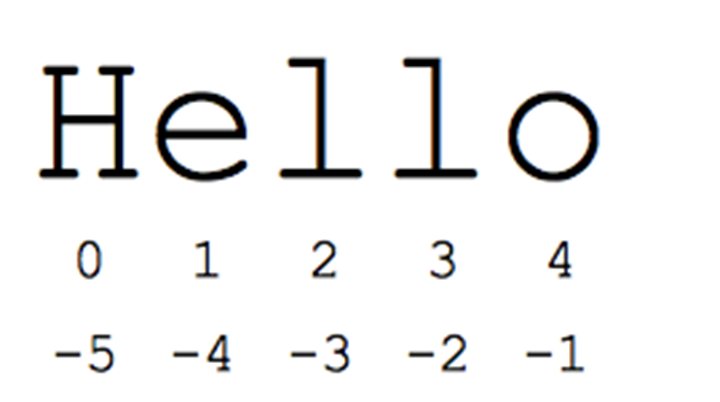

**אינדקסים וחיתוך (slicing) חלים גם על רשימות** בדיוק באותו האופן.

In [ ]:
my_list = [2, 3, 5, 7, 11]

In [ ]:
print(my_list[0])
print(my_list[4])
print(my_list[-3])

In [ ]:
my_list[5]

### חיתוך (Slicing)

גם עם רשימות אפשר לבצע חיתוכים, ממש כפי שעשינו עם מחרוזות. אנחנו משתמשים באותו מבנה מוכר: lst[start:end:step]. 

כשאנחנו חותכים רשימה, אנחנו בעצם יוצרים ממנה רשימה חדשה, שמכילה את האיברים שבטווח שבחרנו. זה מאפשר לנו לעבוד רק עם חלק מהנתונים, בלי לשנות את הרשימה המקורית.

In [ ]:
my_list = [1,2,3,4,5,6,7,8,9,10]

חיתוך מתבצע מאינדקס הstart (כולל) עד אינדקס הend (לא כולל)

In [ ]:
print(my_list[1:5]) # slicing

ניתן להשתמש גם באינדקסים השליליים עבור חיתוך

In [ ]:
print(my_list[0:-1]) # forward/backward indexing

השארת הstart והend ריקים תשתמש בערכים דיפולטיים - תחילת וסוף הרשימה בהתאמה

In [ ]:
print(my_list[::2]) # add a step

In [ ]:
print(my_list[::-1]) # reverse

כאשר נוצר חיתוך ריק, בו לא נמצאים ערכים, נקבל רשימה ריקה.

In [ ]:
print(my_list[3:8:-2]) # output is an empty list. This is NOT an error

כמובן שחיתוך לא משנה את הרשימה המקורית, אלא מייצר רשימה חדשה לחלוטין.

In [ ]:
print(my_list) # slicing does NOT change original list!

In [ ]:
my_list = [1, 2, 3, 4, 5]
new_list = my_list[::2]

print(new_list)
print(my_list)

כלומר, ראינו ששליפה של איברים מתוך רשימה דומה מאוד לשליפת תווים ממחרוזת, על-ידי אינדקסים. אבל היתרון הגדול של רשימות על פני מחרוזות הוא שהן mutable - כלומר, ניתנות לשינוי. זה אומר שאפשר לא רק לקרוא ערך שנמצא במקום מסוים ברשימה, אלא גם להחליף אותו בערך חדש. לדוגמה:

In [ ]:
lst = [10, 20, 30]
lst[1] = 99
print(lst)   # [10, 99, 30]

כאן השתמשנו באינדקס כדי להגיע למיקום השני ברשימה, ואז **הצבנו שם ערך חדש**. פעולה כזו אפשרית כי רשימה היא מבנה נתונים הניתן לשינוי, בניגוד למחרוזות שראינו עד כה, שבהן אי-אפשר לשנות תו קיים אלא רק ליצור מחרוזת חדשה.

#### תרגול
ממשו את הפונקציה `middle_of_list(lst)` אשר מקבלת רשימה `lst` ומחזירה את האיבר במיקום האמצעי שלה.  
אם מדובר ברשימה באורך זוגי, הפונקציה תחזיר את **השמאלי** מבין האיברים האמצעיים.   
**שימו לב:** יש מגוון דרכים לממש את הפונקציה, וניתן לממש זאת באמצעות שורת קוד אחת בלבד.

In [ ]:
def middle_of_list(lst):
    # Write your code here
    pass

```{admonition} **לחצו כאן כדי לצפות בפתרון** 
:class: dropdown, tip

ראשית, ניזכר שאנחנו יודעים למצוא איבר בהינתן האינדקס שלו על-ידי הפקודה `lst[index]`. כלומר, אם נמצא את האינדקס הדרוש, נוכל לבצע `return lst[index]` ובכך לסיים את הפונקציה.
כעת נתמקד בשאלה המעניינת יותר - כיצד למצוא את האינדקס האמצעי לכל אחת מהרשימות?

התשובה לשאלה, כמובן, מסתמכת על אורך הרשימה, ולכן נידרש להשתמש ב`len(lst)`.
נבחן כמה דוגמאות כדי לוודא שאנחנו מבינים איזה אינדקס נרצה לקבל:
אם הרשימה באורך אי-זוגי: אם הרשימה באורך 5, נרצה את אינדקס 2. אם הרשימה באורך 9, נרצה את אינדקס 4. מה המשותף למקרים הללו? מדובר בחצי אורך הרשימה בעיגול כלפי מטה. כלומר במקרים הללו נוכל להשתמש בfloor division על מנת להגיע לאינדקס הרצוי. `index = len(lst)//2`.
אם הרשימה באורך זוגי: אם הרשימה באורך 6, נרצה את אינדקס 2. אם הרשימה באורך 10, נרצה את אינדקס 4. מה קורה במקרים הללו? פה דווקא נרצה את חצי אורך הרשימה פחות אחת. כלומר `index = len(lst)//2 - 1`.

אם כך, דרך ראשונה שהיינו יכולים לפתור בה, הייתה על ידי בלוק תנאי פשוט - שבודק אם הרשימה זוגית ומחזיר את האינדקס בהתאם.
אך אמרנו שניתן לממש את הפונקציה בשורה אחת? אז מה עוד אפשרי לעשות?

ניתן לנצל את העובדה שהביטוי `len(lst) % 2 == 0` מחזיר ערך בוליאני, ובפייתון אפשר להפוך אותו למספר על ידי `int()`. כך, עבור רשימה זוגית נקבל 1, ועבור רשימה אי־זוגית נקבל 0, ונוכל לחשב את האינדקס האמצעי בשורה אחת: `index = len(lst)//2 - int(len(lst)%2 == 0)`.

אך ניתן להגיע לאינדקס בצורה אפילו יותר קצרה! אם נסתכל שוב על הדוגמאות, נוכל לראות תבנית מעניינת: עבור רשימה באורך אי‑זוגי כמו 9, קיבלנו את האינדקס 4, ועבור רשימה באורך זוגי כמו 10, קיבלנו את אותו אינדקס. באופן דומה, עבור רשימה באורך 5 וגם באורך 4, קיבלנו את האינדקס 2. כלומר, אם נתבונן מקרוב, אפשר לראות שיש דרך לחשב את האינדקס האמצעי לכל המקרים בשורה אחת בלבד, בלי צורך בתנאי: `index = (len(lst) - 1) // 2`


ולכן, תוכן הפונקציה הסופי שלנו יכול להיות:
``` python
def middle_of_list(lst):
    return lst[(len(lst)-1)//2)]
```